<a href="https://colab.research.google.com/github/DhananjayJabade1/Business_case_study/blob/main/Upload_target_Sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='terget')

In [ ]:
query_customers = ('''select * from `target_db.customers` ''')
query_geolocation = ('''select * from `target_db.geolocation` ''')
query_order_items = ('''select * from `target_db.order_items` ''')
query_order_reviews = ('''select * from `target_db.order_reviews` ''')
query_orders = ('''select * from `target_db.orders` ''')
query_payments = ('''select * from `target_db.payments` ''')
query_products = ('''select * from `target_db.products` ''')
query_sellers = ('''select * from `target_db.sellers` ''')

In [ ]:
df_customers = client.query(query_customers).to_dataframe()
df_geolocation = client.query(query_geolocation).to_dataframe()
df_order_items = client.query(query_order_items).to_dataframe()
df_order_reviews = client.query(query_order_reviews).to_dataframe()
df_orders = client.query(query_orders).to_dataframe()
df_payments = client.query(query_payments).to_dataframe()
df_products = client.query(query_products).to_dataframe()
df_sellers = client.query(query_sellers).to_dataframe()

In [ ]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
df_geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [ ]:
df_order_items.dtypes

order_id                            object
order_item_id                        int64
product_id                          object
seller_id                           object
shipping_limit_date    datetime64[ns, UTC]
price                              float64
freight_value                      float64
dtype: object

In [ ]:
df_order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [ ]:
df_orders.dtypes

order_id                                      object
customer_id                                   object
order_status                                  object
order_purchase_timestamp         datetime64[ns, UTC]
order_approved_at                datetime64[ns, UTC]
order_delivered_carrier_date     datetime64[ns, UTC]
order_delivered_customer_date    datetime64[ns, UTC]
order_estimated_delivery_date    datetime64[ns, UTC]
dtype: object

In [ ]:
df_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [ ]:
df_products.dtypes

product_id                     object
product_category               object
product_name_length           float64
product_description_length    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
df_sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Getting Min and MAX date

In [ ]:
df_orders['order_purchase_timestamp'].agg(['min', 'max'])

min   2016-09-04 21:15:19+00:00
max   2018-10-17 17:30:18+00:00
Name: order_purchase_timestamp, dtype: datetime64[ns, UTC]

In [ ]:
df_orders['order_delivered_customer_date'].agg(['min', 'max'])

min   2016-10-11 13:46:32+00:00
max   2018-10-17 13:22:46+00:00
Name: order_delivered_customer_date, dtype: datetime64[ns, UTC]

Data is From 2016-09-04 to 2018-10-17

In [ ]:
cities = df_geolocation['geolocation_city'].unique()
cities

array(['aracaju', 'riachuelo', 'nossa senhora do socorro', ...,
       'sorocaba', 'guarulhos', 'sao bernardo do campo'], dtype=object)

In [ ]:
df_geolocation['geolocation_city'].nunique()

8011

In [ ]:
states = df_geolocation['geolocation_state'].unique()
states

array(['SE', 'AL', 'PI', 'AP', 'AM', 'RR', 'AC', 'RO', 'TO', 'BA', 'CE',
       'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PR',
       'RJ', 'RN', 'RS', 'SC', 'SP'], dtype=object)

In [ ]:
df_geolocation['geolocation_state'].nunique()

27

There are 8011 Cities and 27 states

In [ ]:
hours_query = "SELECT EXTRACT(hour FROM order_purchase_timestamp) as HR FROM (SELECT order_id, order_purchase_timestamp FROM `terget.target_db.orders`)"
df_hours = client.query(hours_query).to_dataframe()
df_hours

,HR
0,3
1,3
2,4
3,5
4,3
...,...
99436,23
99437,23
99438,23
99439,23


In [ ]:
hours_query = "SELECT order_purchase_timestamp as HH FROM `terget.target_db.orders`"
df_hours = client.query(hours_query).to_dataframe()

In [ ]:
Dawn = 0
Morning = 0
Afternoon = 0
Evening = 0
Night = 0

import datetime

for index,row in df_hours.iterrows():
  tt = str(row[0])
  d = datetime.datetime.fromisoformat(tt)
  i = d.hour
  if i < 3 :
    Night += 1
  elif i >= 3 and i < 7:
    Dawn += 1
  elif i >= 7 and i < 12:
    Morning += 1
  elif i >= 12 and i < 16:
    Afternoon += 1
  elif i >= 16 and i < 20:
    Evening += 1
  elif i >= 20:
    Night += 1


print(Dawn)
print(Morning)
print(Afternoon)
print(Evening)
print(Night)

1168
21738
25536
24576
26423


Most of the orders are place at Night, compared to Dawn, Morning or Afternoon.From evening 4pm to morning 3am 50999 orders are placed. Below is the hour wise order details.

In [ ]:
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
count_7 = 0
count_8 = 0
count_9 = 0
count_10 = 0
count_11 = 0
count_12 = 0
count_13 = 0
count_14 = 0
count_15 = 0
count_16 = 0
count_17 = 0
count_18 = 0
count_19 = 0
count_20 = 0
count_21 = 0
count_22 = 0
count_23 = 0


for index,row in df_hours.iterrows():
  tt = str(row[0])
  d = datetime.datetime.fromisoformat(tt)
  i = d.hour
  if i == 0:
    count_0 += 1
  if i == 1:
      count_1 += 1
  if i == 2:
      count_2 += 1
  if i == 3:
      count_3 += 1
  if i == 4:
      count_4 += 1
  if i == 5:
      count_5 += 1
  if i == 6:
      count_6 += 1
  if i == 7:
      count_7 += 1
  if i == 8:
      count_8 += 1
  if i == 9:
      count_9 += 1
  if i == 10:
      count_10 += 1
  if i == 11:
      count_11 += 1
  if i == 12:
      count_12 += 1
  if i == 13:
      count_13 += 1
  if i == 14:
      count_14 += 1
  if i == 15:
      count_15 += 1
  if i == 16:
      count_16 += 1
  if i == 17:
      count_17 += 1
  if i == 18:
      count_18 += 1
  if i == 19:
      count_19 += 1
  if i == 20:
      count_20 += 1
  if i == 21:
      count_21 += 1
  if i == 22:
      count_22 += 1
  if i == 23:
      count_23 += 1


print(f'count_0 = {count_0}')
print(f'count_1 = {count_1}')
print(f'count_2 = {count_2}')
print(f'count_3 = {count_3}')
print(f'count_4 = {count_4}')
print(f'count_5 = {count_5}')
print(f'count_6 = {count_6}')
print(f'count_7 = {count_7}')
print(f'count_8 = {count_8}')
print(f'count_9 = {count_9}')
print(f'count_10 = {count_10}')
print(f'count_11 = {count_11}')
print(f'count_12 = {count_12}')
print(f'count_13 = {count_13}')
print(f'count_14 = {count_14}')
print(f'count_15 = {count_15}')
print(f'count_16 = {count_16}')
print(f'count_17 = {count_17}')
print(f'count_18 = {count_18}')
print(f'count_19 = {count_19}')
print(f'count_20 = {count_20}')
print(f'count_21 = {count_21}')
print(f'count_22 = {count_22}')
print(f'count_23 = {count_23}')

count_0 = 2394
count_1 = 1170
count_2 = 510
count_3 = 272
count_4 = 206
count_5 = 188
count_6 = 502
count_7 = 1231
count_8 = 2967
count_9 = 4785
count_10 = 6177
count_11 = 6578
count_12 = 5995
count_13 = 6518
count_14 = 6569
count_15 = 6454
count_16 = 6675
count_17 = 6150
count_18 = 5769
count_19 = 5982
count_20 = 6193
count_21 = 6217
count_22 = 5816
count_23 = 4123


Maximum orders are place from 4pm to 5pm, i.e. 6675 orders

Minumum orders are place from 4am to 5am, i.e. 206 orders

In [ ]:
year_2015 = 0
year_2016 = 0
year_2017 = 0
year_2018 = 0
year_2019 = 0

for index,row in df_hours.iterrows():
  tt = str(row[0])
  d = datetime.datetime.fromisoformat(tt)
  i = d.year
  if i == 2015:
    year_2015 += 1
  if i == 2016:
      year_2016 += 1
  if i == 2017:
      year_2017 += 1
  if i == 2018:
      year_2018 += 1
  if i == 2019:
      year_2019 += 1


print(f'year_2015 = {year_2015}')
print(f'year_2016 = {year_2016}')
print(f'year_2017 = {year_2017}')
print(f'year_2018 = {year_2018}')
print(f'year_2019 = {year_2019}')

year_2015 = 0
year_2016 = 329
year_2017 = 45101
year_2018 = 54011
year_2019 = 0


As the data is from 2016 to 2018, just to verify year 2015 and 2019 are considered. The orders can be seen increasing year over year so yes there is growing trend in e-commerce.


In [ ]:
month_1 = 0
month_2 = 0
month_3 = 0
month_4 = 0
month_5 = 0
month_6 = 0
month_7 = 0
month_8 = 0
month_9 = 0
month_10 = 0
month_11 = 0
month_12 = 0

for index,row in df_hours.iterrows():
  tt = str(row[0])
  d = datetime.datetime.fromisoformat(tt)
  i = d.month
  if i == 1:
      month_1 += 1
  if i == 2:
      month_2 += 1
  if i == 3:
      month_3 += 1
  if i == 4:
      month_4 += 1
  if i == 5:
      month_5 += 1
  if i == 6:
      month_6 += 1
  if i == 7:
      month_7 += 1
  if i == 8:
      month_8 += 1
  if i == 9:
      month_9 += 1
  if i == 10:
      month_10 += 1
  if i == 11:
      month_11 += 1
  if i == 12:
      month_12 += 1


print(f'month_1 = {month_1}')
print(f'month_2 = {month_2}')
print(f'month_3 = {month_3}')
print(f'month_4 = {month_4}')
print(f'month_5 = {month_5}')
print(f'month_6 = {month_6}')
print(f'month_7 = {month_7}')
print(f'month_8 = {month_8}')
print(f'month_9 = {month_9}')
print(f'month_10 = {month_10}')
print(f'month_11 = {month_11}')
print(f'month_12 = {month_12}')



month_1 = 8069
month_2 = 8508
month_3 = 9893
month_4 = 9343
month_5 = 10573
month_6 = 9412
month_7 = 10318
month_8 = 10843
month_9 = 4305
month_10 = 4959
month_11 = 7544
month_12 = 5674


Sale is higher during May, July and August

Sale is Lower during september and October


**Evolution of E-commerce**

In [ ]:
query_mnt_n_mnt = '''select format_datetime("%B", order_purchase_timestamp) as Month, count(order_id) as Order_count, cust.customer_state, cust.customer_city from `target_db.orders`as ord
left join `target_db.customers`as cust on ord.customer_id = cust.customer_id group by format_datetime("%B", order_purchase_timestamp),cust.customer_state,cust.customer_city '''
df_mnt_n_mnt = client.query(query_mnt_n_mnt).to_dataframe()
df_mnt_n_mnt.head()

,Month,Order_count,customer_state,customer_city
0,February,196,DF,brasilia
1,January,151,DF,brasilia
2,September,97,DF,brasilia
3,May,208,DF,brasilia
4,June,217,DF,brasilia


In [ ]:
query_cust_distribution = '''select count(*) as customers, customer_state, customer_city from `target_db.customers` group by customer_state,customer_city'''
df_cust_distribution = client.query(query_cust_distribution).to_dataframe()
df_cust_distribution.head()

,customers,customer_state,customer_city
0,3,RN,acu
1,8,CE,ico
2,2,RS,ipe
3,4,CE,ipu
4,3,SC,ita


**Impact on Economy**

In [ ]:
query_2017_orders = '''select SUM(price) as PR1 from `target_db.order_items` as item left 
join `target_db.orders` as ord on item.order_id = ord.order_id where DATE(ord.order_purchase_timestamp) between '2017-01-01' and '2017-08-31'''
client.query(query_2017_orders)


In [ ]:
query_2018_orders = '''select SUM(price) as PR1 from `target_db.order_items` as item left 
join `target_db.orders` as ord on item.order_id = ord.order_id where DATE(ord.order_purchase_timestamp) between '2018-01-01' and '2018-08-31'''
df_2018_orders = client.query(query_2018_orders)
df_2018_orders

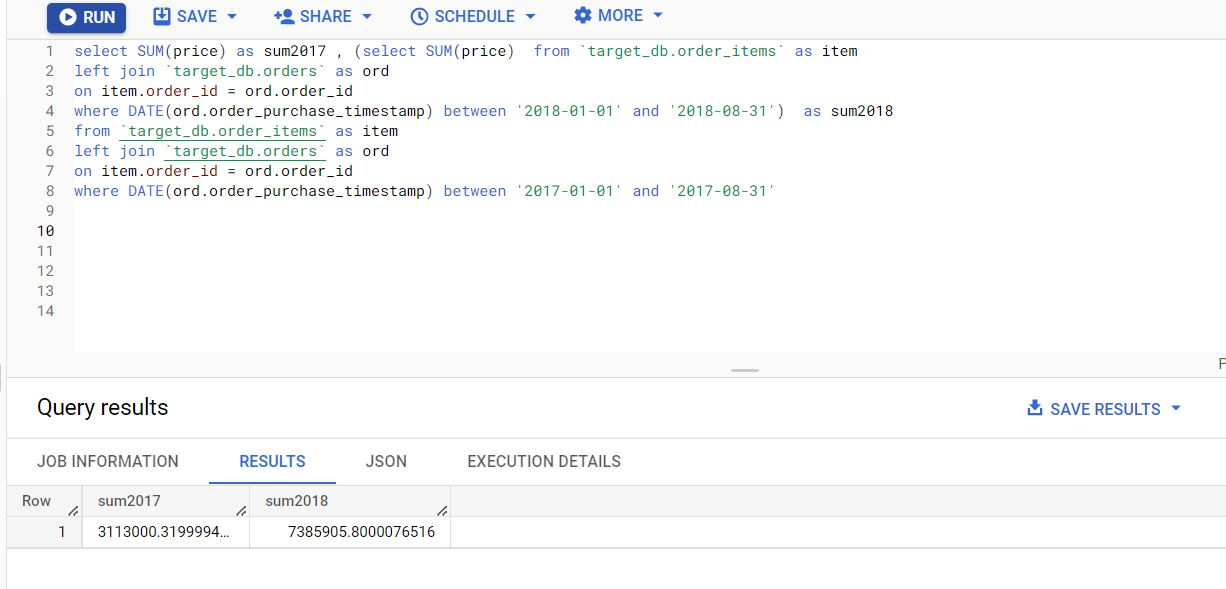

This is query I am able to run in BigQuery but not able to convert or run in colab. The % increase from 2017 to 2018 is (7385905.800 ÷ 3113000.31)*100 =  237.26%

**237.26 is percentage increase from 2017 to 2018**

In [ ]:
query_mean_sum = '''select AVG(freight_value)as mean_freight_value, AVG(price) as mean_price , SUM(freight_value)as sum_freight_value, SUM(price) as sum_price,cust.customer_state from `target_db.order_items` as item
left join `target_db.orders` as ord on item.order_id =ord.order_id left join `target_db.customers` as cust on ord.customer_id = cust.customer_id group by cust.customer_state'''
df_mean_sum = client.query(query_mean_sum).to_dataframe()
df_mean_sum.head()

,mean_freight_value,mean_price,sum_freight_value,sum_price,customer_state
0,15.147275,109.653629,718723.07,5.202955e+06,SP
1,20.960924,125.117818,305589.31,1.824093e+06,RJ
2,20.531652,119.004139,117851.68,6.830838e+05,PR
3,21.470369,124.653578,89660.26,5.205533e+05,SC
4,21.041355,125.770549,50625.50,3.026039e+05,DF


In [ ]:
query_estimate = '''select date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_purchase_timestamp),DAY) as actual_delivery_days, date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_estimated_delivery_date),DAY) as Estimated_delivery_days from `target_db.orders` as ord'''
df_estimate = client.query(query_estimate).to_dataframe()
df_estimate.head()


,actual_delivery_days,Estimated_delivery_days
0,30.0,12.0
1,31.0,-29.0
2,36.0,-17.0
3,31.0,-2.0
4,33.0,-1.0


In [ ]:
df_estimate.describe()

,actual_delivery_days,Estimated_delivery_days
count,96476.000000,96476.000000
mean,12.497336,-11.876881
std,9.555460,10.183854
min,0.000000,-147.000000
25%,7.000000,-17.000000
50%,10.000000,-12.000000
75%,16.000000,-7.000000
max,210.000000,188.000000


From Ablove table it can be observed that, Estimated Delivery days are predicated very low compared to actual delivery date.

In [ ]:
query_clomns = '''select date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_purchase_timestamp),DAY) as time_to_delivery,date_diff( DATE(ord.order_estimated_delivery_date) , 
DATE(ord.order_delivered_customer_date),DAY) as diff_estimated_delivery  from `target_db.orders` as ord'''
df_columns = client.query(query_clomns).to_dataframe()
df_columns.head()

,time_to_delivery,diff_estimated_delivery
0,30.0,-12.0
1,31.0,29.0
2,36.0,17.0
3,31.0,2.0
4,33.0,1.0


Columns are created as requested.

In [ ]:
query_group_state = '''select AVG(freight_value) as mean_freight_value ,Avg(date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_purchase_timestamp),DAY)) as mean_time_to_delivery, 
avg(date_diff( DATE(ord.order_estimated_delivery_date) , DATE(ord.order_delivered_customer_date),DAY)) as mean_diff_estimated_delivery ,cust.customer_state from `target_db.order_items` as ordit
left join `target_db.orders` as ord on ord.order_id = ordit.order_id LEFT JOIN `target_db.customers` as cust on ord.customer_id =cust.customer_id group by cust.customer_state'''
df_group_state = client.query(query_group_state).to_dataframe()
df_group_state.head()

,mean_freight_value,mean_time_to_delivery,mean_diff_estimated_delivery,customer_state
0,15.147275,8.662253,11.207911,SP
1,20.960924,15.074791,12.014774,RJ
2,20.531652,11.893078,13.486104,PR
3,21.470369,14.950220,11.572718,SC
4,21.041355,12.893843,12.200425,DF


Data Sorting

In [ ]:
query_avg_freight_val = '''select AVG(freight_value) as average_freight_value, sel.seller_state from `target_db.order_items` as ord
left join `target_db.sellers` as sel on ord.seller_id = sel.seller_id group by sel.seller_state order by AVG(freight_value) DESC limit 5 '''
df_avg_freight_val = client.query(query_avg_freight_val).to_dataframe()
df_avg_freight_val

,average_freight_value,seller_state
0,50.912857,RO
1,46.381170,CE
2,39.188158,PB
3,36.943333,PI
4,32.840000,AC


In [ ]:
query_avg_freight_val_ascen = '''select AVG(freight_value) as average_freight_value, sel.seller_state from `target_db.order_items` as ord
left join `target_db.sellers` as sel on ord.seller_id = sel.seller_id group by sel.seller_state order by AVG(freight_value) ASC limit 5 '''
df_avg_freight_val_ascen = client.query(query_avg_freight_val_ascen).to_dataframe()
df_avg_freight_val_ascen

,average_freight_value,seller_state
0,18.452213,SP
1,19.388750,PA
2,19.474865,RJ
3,20.571813,DF
4,22.720969,PR


In [ ]:
query_avg_delivery = '''select AVG(date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_purchase_timestamp),DAY)) as time_to_delivery,cust.customer_state from `target_db.orders`as ord
left join `target_db.customers` as cust
on ord.customer_id=cust.customer_id
group by cust.customer_state
order by  AVG(date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_purchase_timestamp),DAY)) DESC limit 5'''
df_avg_delivery = client.query(query_avg_delivery).to_dataframe()
df_avg_delivery

,time_to_delivery,customer_state
0,29.341463,RR
1,27.179104,AP
2,26.358621,AM
3,24.501259,AL
4,23.725159,PA


In [ ]:
query_avg_delivery_fast = '''select date_diff( DATE(ord.order_delivered_customer_date), DATE(ord.order_estimated_delivery_date), DAY) as time_to_delivery, cust.customer_state FROM  `target_db.orders` as ord LEFT JOIN 
`target_db.customers` AS cust ON ord.customer_id = cust.customer_id where  date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_estimated_delivery_date),DAY) is not null order by time_to_delivery desc limit 5'''
df_avg_delivery_fast = client.query(query_avg_delivery_fast).to_dataframe()
df_avg_delivery_fast

,time_to_delivery,customer_state
0,188,RJ
1,181,ES
2,175,SP
3,167,SP
4,166,SE


In [ ]:
query_avg_delivery_fast = '''select date_diff( DATE(ord.order_delivered_customer_date), DATE(ord.order_estimated_delivery_date), DAY) as time_to_delivery, cust.customer_state FROM  `target_db.orders` as ord LEFT JOIN 
`target_db.customers` AS cust ON ord.customer_id = cust.customer_id where  date_diff( DATE(ord.order_delivered_customer_date) , DATE(ord.order_estimated_delivery_date),DAY) is not null order by time_to_delivery asc limit 5'''
df_avg_delivery_fast = client.query(query_avg_delivery_fast).to_dataframe()
df_avg_delivery_fast

,time_to_delivery,customer_state
0,-147,SP
1,-140,MA
2,-135,RS
3,-124,SP
4,-109,RJ


Above two table for ascending and ecending values

In [ ]:
query_payment_type = '''select count(pay.order_id) as no_of_payment , pay.payment_type, format_datetime("%B", order_purchase_timestamp) as Month from `target_db.payments` as pay left join `target_db.orders` as ord
on pay.order_id =ord.order_id group by pay.payment_type, format_datetime("%B", order_purchase_timestamp)'''
df_payment_type = client.query(query_payment_type).to_dataframe()
df_payment_type.head()

,no_of_payment,payment_type,Month
0,8350,credit_card,May
1,7301,credit_card,April
2,477,voucher,January
3,572,voucher,April
4,318,voucher,October


In [ ]:
query_payment_installment = '''select count(order_id) as no_of_transactions, pay.payment_installments from `target_db.payments` as pay group by pay.payment_installments'''
df_payment_installment = client.query(query_payment_installment).to_dataframe()
df_payment_installment.head()

,no_of_transactions,payment_installments
0,2,0
1,52546,1
2,12413,2
3,10461,3
4,7098,4


In [ ]:
df_payment_installment.describe()

,no_of_transactions,payment_installments
count,24.000000,24.000000
mean,4328.583333,11.708333
std,10870.384106,7.369025
min,1.000000,0.000000
25%,13.250000,5.750000
50%,50.500000,11.500000
75%,4510.750000,17.250000
max,52546.000000,24.000000


average loan taken is for 12 months